In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# 1. Load and preprocess data
df = pd.read_csv('customer_data_records.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [9]:
# Standardize the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'WCSS (Within-Cluster Sum of Squares)')

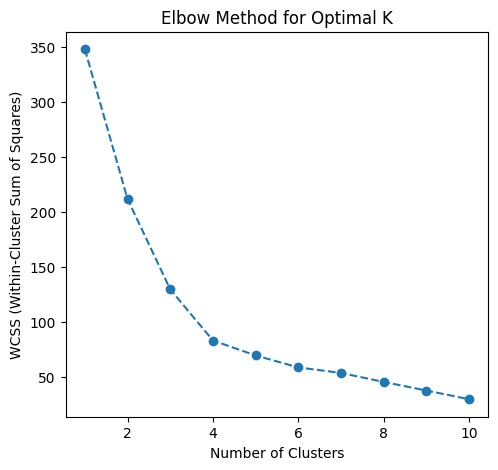

In [10]:
# 2. Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

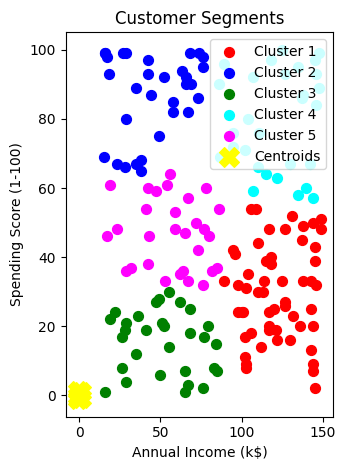

In [11]:
# 3. Perform K-means clustering (K=5 based on elbow plot)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# 4. Visualize the clusters (original scale)
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=50, c=colors[i], 
                label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200, marker='X', c='yellow', 
            label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.tight_layout()

In [12]:
# 5. Analyze cluster characteristics
df['Cluster'] = y_kmeans + 1  # Make clusters start from 1
cluster_stats = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("\nCLUSTER STATISTICS:")
print(cluster_stats)

plt.show()


CLUSTER STATISTICS:
        Annual Income (k$)            Spending Score (1-100)            Count
                      mean        std                   mean        std count
Cluster                                                                      
1               121.600000  17.379852              29.818182  13.722232    55
2                45.387097  20.624706              86.903226  11.719940    31
3                51.500000  21.306871              15.533333   8.869682    30
4               121.862069  20.467263              79.413793  14.398703    29
5                56.896552  20.217293              46.793103  10.072520    29
